In 2003, oncologist Dr. Rita Mehta had "the kind of moment everyone lives for" — everyone, that is, who's working to find a cure for cancer.

Breast cancer is a cancer that forms in the cells of the breasts.
It can occur in women and rarely in men.
Symptoms of breast cancer include a lump in the breast, bloody discharge from the nipple and changes in the shape or texture of the nipple or breast. Treatment depends on the stage of cancer. It may consist of chemotherapy, radiation and surgery.

It's important to understand that most breast lumps are benign and not cancer (malignant). Non-cancerous breast tumors are abnormal growths, but they do not spread outside of the breast. They are not life threatening, but some types of benign breast lumps can increase a woman's risk of getting breast cancer. Which is why it is important for us to create a predictive model to ease the researchers works.

![images.jpg](attachment:af26407c-bd94-4527-98ac-5d366f8305fb.jpg)

## Table of Content
1. Problem Statement
2. Load Library
3. Data Collection
4. Data Cleaning
5. Data Analytics
6. Build Model
7. Validate Model
8. Deployment

### Problem Statement
Diagnose whether a patient has benign or malignant cancer with past data set

### Load Library

In [54]:
library(readr)
library(class)

### Data Collection

In [55]:
cancerdata <- read.csv("../input/breast-cancer-wisconsin-data/data.csv")

In [56]:
str(cancerdata)

'data.frame':	569 obs. of  33 variables:
 $ id                     : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ diagnosis              : Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se            

In [57]:
tail(cancerdata)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,X
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
564,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,⋯,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873,NA
565,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,⋯,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NA
566,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,⋯,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NA
567,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,⋯,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NA
568,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,⋯,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NA
569,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,⋯,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NA


In [58]:
head(cancerdata)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,X
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NA
2,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NA
3,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NA
4,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NA
5,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NA
6,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NA


In [59]:
names(cancerdata)

[1] "id"                      "diagnosis"              
 [3] "radius_mean"             "texture_mean"           
 [5] "perimeter_mean"          "area_mean"              
 [7] "smoothness_mean"         "compactness_mean"       
 [9] "concavity_mean"          "concave.points_mean"    
[11] "symmetry_mean"           "fractal_dimension_mean" 
[13] "radius_se"               "texture_se"             
[15] "perimeter_se"            "area_se"                
[17] "smoothness_se"           "compactness_se"         
[19] "concavity_se"            "concave.points_se"      
[21] "symmetry_se"             "fractal_dimension_se"   
[23] "radius_worst"            "texture_worst"          
[25] "perimeter_worst"         "area_worst"             
[27] "smoothness_worst"        "compactness_worst"      
[29] "concavity_worst"         "concave.points_worst"   
[31] "symmetry_worst"          "fractal_dimension_worst"
[33] "X"

### Data Cleaning

In [60]:
#ID is not needed as well as X, so we remove them
cancerdata$ID <- NULL
cancerdata$X <- NULL

In [61]:
cancerdata$id <- NULL

### Data Analytics

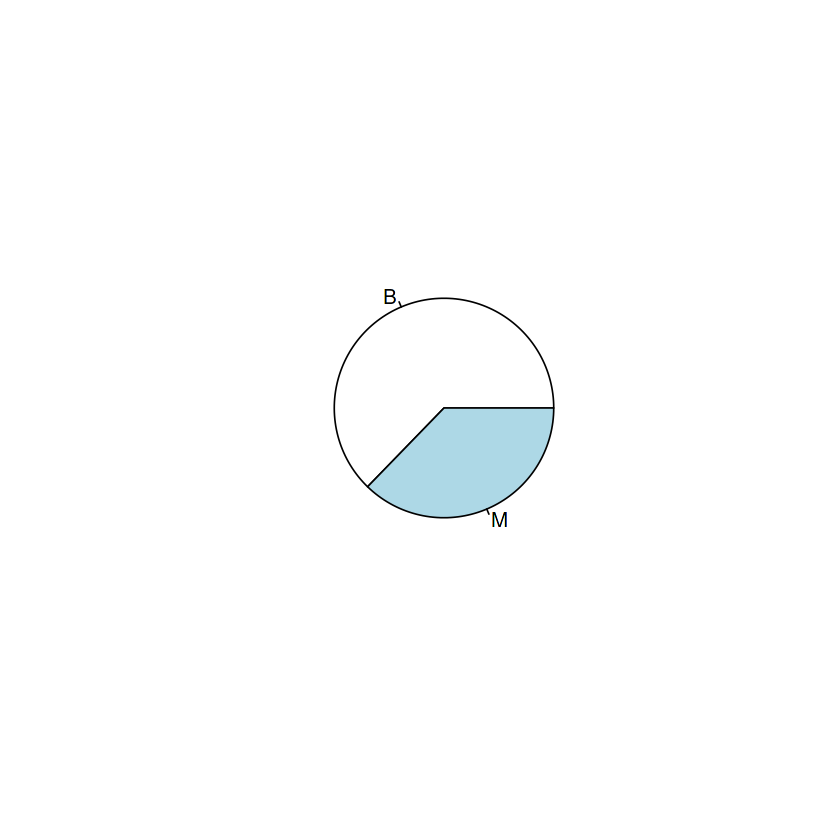

In [62]:
pie(visual)

In [63]:
#Identify missing data
cancerdata <- cancerdata[complete.cases(cancerdata),]

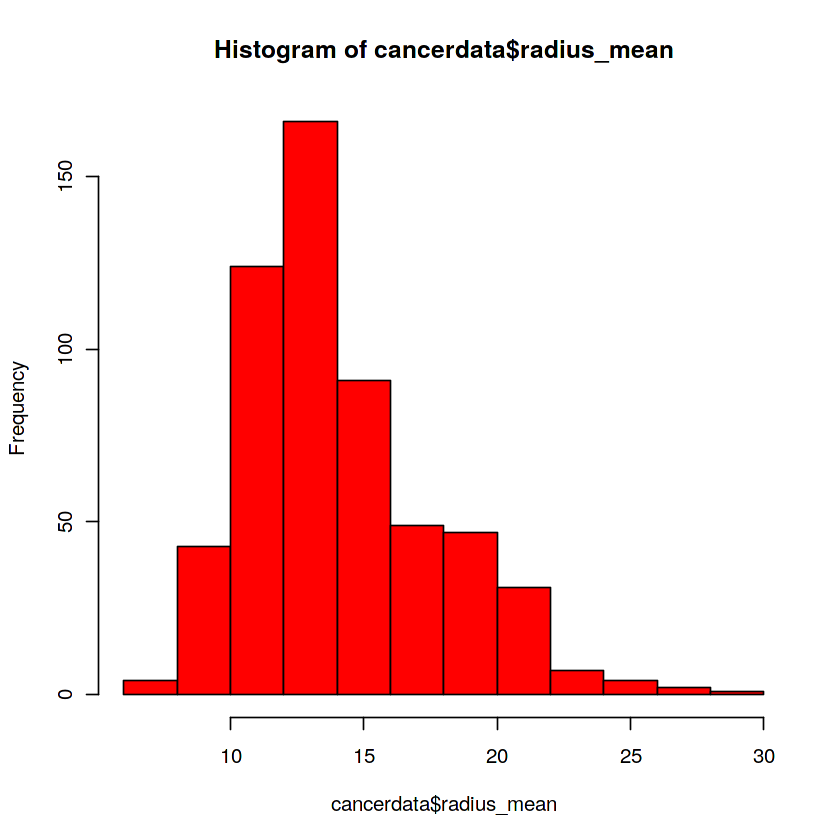

In [64]:
hist(cancerdata$radius_mean, col= "red")

### Build the Model
#### Data Splicing

In [65]:
str(cancerdata)

'data.frame':	569 obs. of  31 variables:
 $ diagnosis              : Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se             : num  0.905 0.734 0.787 1.156 0.781 ...
 $ perimeter_se           : num  8.59 3.4 4.58 3.44 5.44 ...
 $ area_se    

In [66]:
#Split data into train and test
trainset <- cancerdata[1:398, 2:31]
tesset <- cancerdata[399:569, 2:31]

In [67]:
#Split Outcome
trainoutcome <- cancerdata[1:398, 1]
testoutcome <- cancerdata[399:569, 1]

## Use KNN 

In [68]:
prediction <- knn(train = trainset, cl = trainoutcome, k = 20, test = tesset)
prediction

[1] B B M B B B B B M B M B B B B B M B B M B B B B B B B B B B B B B B M M B
 [38] M B B B B B M B B M B M B B M B M B B B B B B B B M M B B B B B B M B B B
 [75] M B B B M B B M B M B B B B B M B M B M M B B B B B M M B M B M B B B B M
[112] M B B M B M B M M B B B M B B B B B B B B B B B M B M B B B B B B B B B B
[149] B B B B B B B B B B B B B B B B M M M M M M B
Levels: B M

### Model Evaluation

In [69]:
table(testoutcome, prediction)

           prediction
testoutcome   B   M
          B 126   6
          M   2  37

### Finding Accuracy

In [70]:
visual = table(cancerdata$diagnosis)
visual


  B   M 
357 212 

In [71]:
actualpredict <- data.frame(cbind(actuals = testoutcome, predicted = prediction))
correlation <- cor(actualpredict)
head(actualpredict)

,actuals,predicted
,<int>,<int>
1,1,1
2,1,1
3,2,2
4,1,1
5,1,1
6,1,1
